# Data Analysis on Obesity Rates
This notebook explores the relationship between socioeconomic factors, exercise routines, and obesity rates across different age groups and genders. It also examines how these relationships have evolved over time (2018-2024).


## Step 1: Import Required Libraries
We start by importing the necessary libraries for data analysis and visualization.


In [20]:
%matplotlib inline

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Step 2: Load the Dataset
The dataset is loaded from a CSV file. Ensure the file path is correct before proceeding.


In [22]:
data_path= os.path.join(
    os.path.dirname("__file__"), "sampled_data.csv"
)
data = pd.read_csv(data_path)

## Step 3: Descriptive Statistics
We perform basic descriptive statistics to understand the dataset's structure and summary.

### 3.1 Numerical Columns
The table below provides a summary of the numerical columns in the dataset.


In [23]:
descriptive_stats = data.describe()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)


Descriptive Statistics for Numerical Columns:
         YearStart   Data_Value    Sample_Size
count  4082.000000  4082.000000    4082.000000
mean   2020.550220    32.798065    3450.398089
std       1.752109    10.335012   18164.731126
min    2018.000000     4.000000      50.000000
25%    2019.000000    26.125000     448.000000
50%    2021.000000    33.200000    1001.500000
75%    2022.000000    38.475000    2305.750000
max    2023.000000    85.300000  430714.000000


### 3.2 Categorical Columns- observations
The value counts for each categorical column are shown below.


In [24]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())



Value Counts for LocationDesc:
LocationDesc
California              94
Texas                   90
Oklahoma                90
South Carolina          89
Colorado                87
Nebraska                86
Michigan                86
North Dakota            83
Minnesota               83
National                83
Indiana                 83
Arizona                 83
Ohio                    83
New York                81
Kansas                  81
Iowa                    78
West Virginia           78
Washington              78
Nevada                  78
Wisconsin               77
District of Columbia    77
Virginia                77
Alaska                  77
Connecticut             76
Arkansas                76
Mississippi             76
Maryland                76
Oregon                  76
North Carolina          75
Idaho                   73
Delaware                73
Puerto Rico             73
Maine                   73
Massachusetts           73
Utah                    73
Illinois  


## Step 4: Analysis of Key Categories
### 4.1: Explore `Class` and `StratificationCategory1`
Summarize `Data_Value` for each class by stratification category.

In [25]:
class_summary = data.groupby(['Class', 'StratificationCategory1'])['Data_Value'].mean().unstack()
print("Mean Data_Value by Class and StratificationCategory1:")
print(class_summary)

Mean Data_Value by Class and StratificationCategory1:
StratificationCategory1  Age (years)  Education     Gender     Income  \
Class                                                                   
Fruits and Vegetables      31.464583  32.626582  30.412500  31.871034   
Obesity / Weight Status    33.633333  34.192388  33.473620  33.879694   
Physical Activity          31.903023  32.863230  32.912903  31.942664   

StratificationCategory1  Race/Ethnicity      Total  
Class                                               
Fruits and Vegetables         32.125397  29.486364  
Obesity / Weight Status       32.602736  33.671698  
Physical Activity             32.571078  35.705479  


## Step 5: Visualize Trends for "Obesity / Weight Status" 
 ### 5.1: Obesity Rates Over Time (Aggregated)

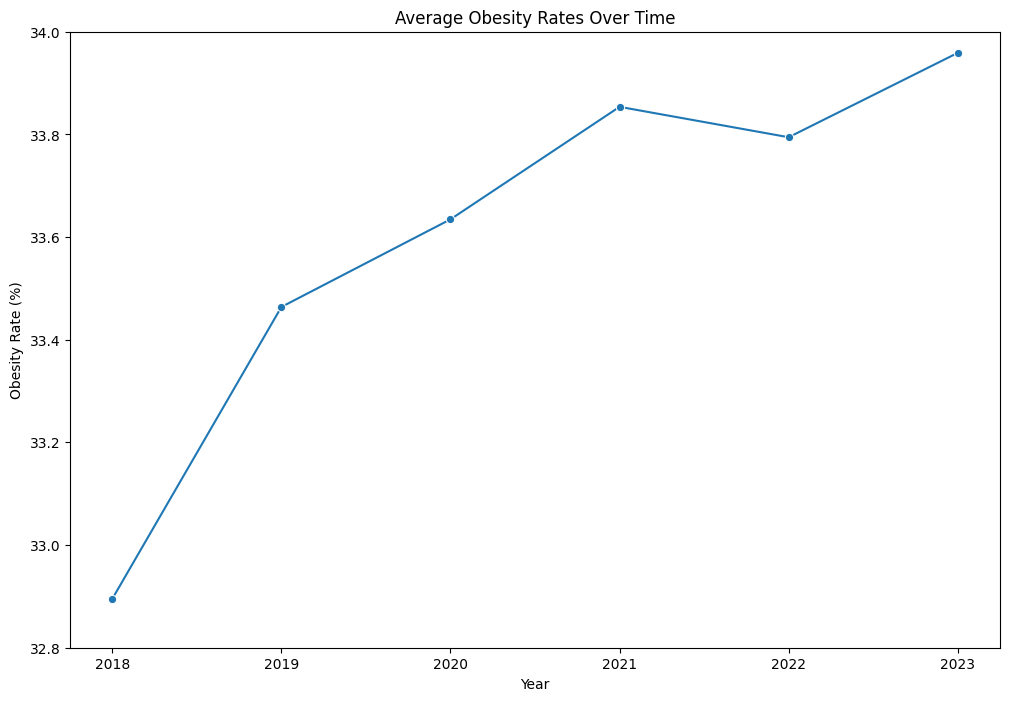

In [26]:
plt.figure(figsize=(12, 8))
obesity_data = data[data['Class'] == 'Obesity / Weight Status']
obesity_aggregated = obesity_data.groupby('YearStart')["Data_Value"].mean().reset_index()
sns.lineplot(data=obesity_aggregated, x="YearStart", y="Data_Value", marker="o")
plt.title("Average Obesity Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.ylim(32.8, 34)  # Adjusted y-axis to focus on the detailed range
plt.yticks([  32.8, 33, 33.2, 33.4, 33.6, 33.8, 34])  # Custom ticks for granularity
plt.show()

 ### Observations:
1. We observe that the obesity rate has shown a gradual increase over time, rising from 32.8% in 2018 to nearly 34% by 2023. 
2.Although the increase appears slight, it reflects a consistent and progressive upward trend that warrants attention.

### 5.2  Obesity Rates Over Time by Gender

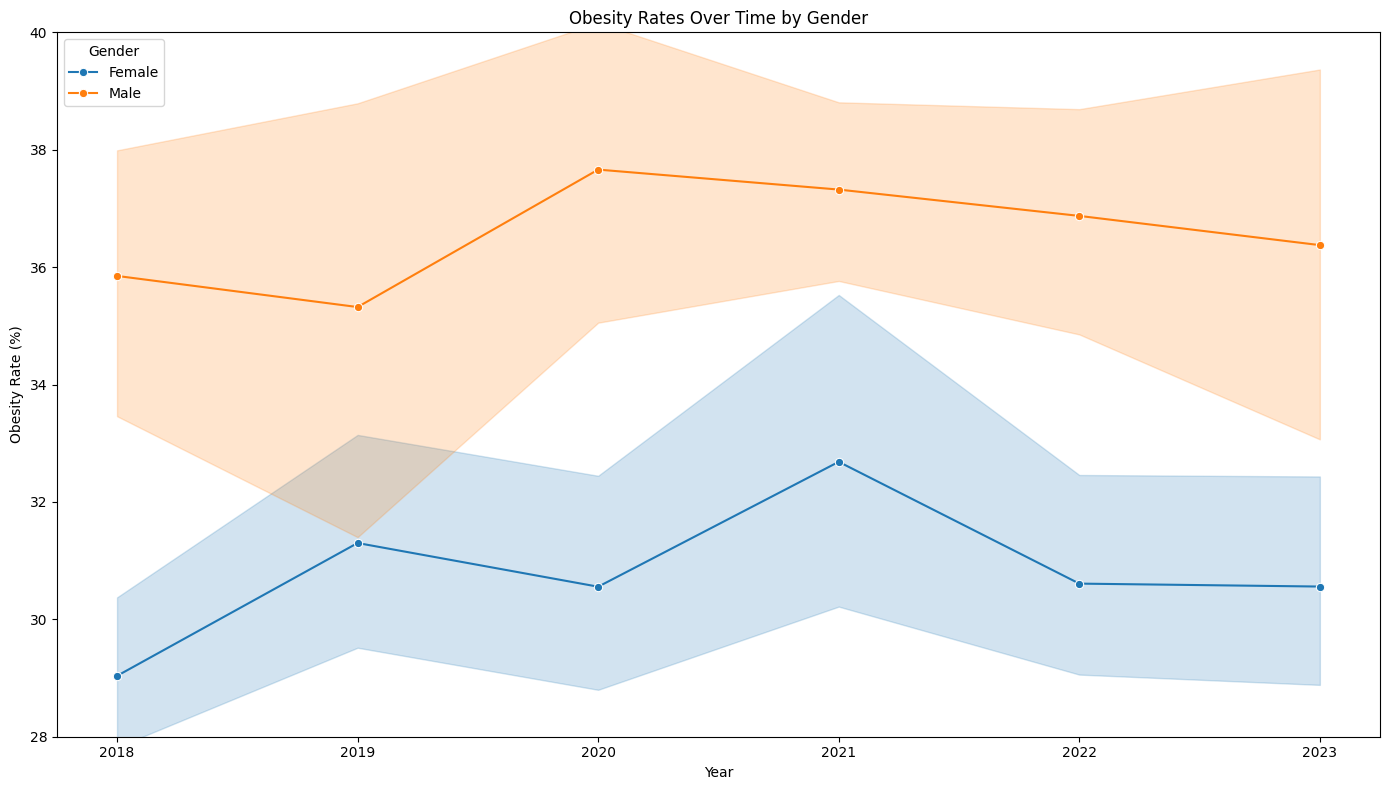

In [27]:
plt.figure(figsize=(14, 8))
gender_data = obesity_data[obesity_data['StratificationCategory1'] == 'Gender']
sns.lineplot(
    data=gender_data,
    x="YearStart",
    y="Data_Value",
    hue="Stratification1",
    marker="o"
)
plt.title("Obesity Rates Over Time by Gender")
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.ylim(28, 40)  # Focused range for gender-specific analysis
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

### Observations:
1.The obesity rates for males have consistently remained higher than for females across all years.The rates slightly fluctuated but showed a gradual decline from 2020 to 2023.
2.The obesity rates for females exhibit more variation over the years.A notable increase occurred between 2018 and 2021, but the rates plateaued and remained relatively stable from 2021 to 2023.

## Step 6 :The role of socioeconomic status in obesity trends over time.
Next, we explore how obesity rates vary across different income groups. 
To simplify, we categorize incomes into three levels:
- **Lower Class**
- **Middle Class**
- **Upper Class** 

This analysis will help us understand the role of socioeconomic status in obesity trends over time.
### 6.1 .Filter data for income status
## Obesity Rates by Income Groups Over Time

In [28]:
def categorize_income(income_stratification):
    if 'Less than $15,000' in income_stratification:
        return 'Low Income'
    elif '$15,000 - $24,999' in income_stratification:
        return 'Low Income'
    elif '$25,000 - $34,999' in income_stratification:
        return 'Low Income'
    elif '$35,000 - $49,999' in income_stratification:
        return 'Middle Class'
    elif '$50,000 - $74,999' in income_stratification:
        return 'Middle Class'
    elif '$75,000 or greater' in income_stratification:
        return 'Upper Class'
    else:
        return 'Other'  # For 'Data not reported' or unexpected categories
# Debugging: Print a sample of the income-related rows
income_data_raw = data[(data['StratificationCategory1'] == 'Income') & (data['Class'] == 'Obesity / Weight Status')]
print("Sample of income-related rows from the dataset:")
print(income_data_raw[['YearStart', 'Stratification1', 'Data_Value']].head(20))  # Display relevant columns

# Debugging: Check the unique income categories before categorization
print("Unique income categories in 'Stratification1':", income_data_raw['Stratification1'].unique())

# Apply categorization function
income_data_raw['Income_Group'] = income_data_raw['Stratification1'].apply(categorize_income)

# Debugging: Check counts of income groups after categorization
print("Counts of categorized income groups:")
print(income_data_raw['Income_Group'].value_counts())

# Check if "Middle class" and "Upper class" groups have data
if 'Middle Class' not in income_data_raw['Income_Group'].unique():
    print("Middle class data is missing!")
if 'Upper Class' not in income_data_raw['Income_Group'].unique():
    print("Upper class data is missing!")

# Debugging: Check the unique income groups in the raw data
print("Unique Income Groups after categorization:", income_data_raw['Income_Group'].unique())

# Additional check: Print rows where income groups are classified as 'Other'
print("Rows classified as 'Other':")
print(income_data_raw[income_data_raw['Income_Group'] == 'Other'])

# Optional: Check the raw data for missing categories
all_income_data = data[data['StratificationCategory1'] == 'Income']
print("Raw Income Stratification Categories:", all_income_data['Stratification1'].unique())

Sample of income-related rows from the dataset:
     YearStart     Stratification1  Data_Value
19        2018   Less than $15,000        26.2
30        2021   $35,000 - $49,999        35.8
34        2021   $35,000 - $49,999        31.4
38        2020   $35,000 - $49,999        31.2
42        2022   $35,000 - $49,999        35.7
50        2019   $15,000 - $24,999        29.6
53        2023   Data not reported        34.0
81        2021   Data not reported        37.7
83        2018   $25,000 - $34,999        31.8
106       2018   $25,000 - $34,999        34.5
113       2020   $15,000 - $24,999        30.1
125       2023   $50,000 - $74,999        34.9
128       2023   Less than $15,000        27.6
138       2023   $50,000 - $74,999        40.3
144       2022   Data not reported        35.3
149       2019   $35,000 - $49,999        36.8
154       2019   Data not reported        28.5
157       2021  $75,000 or greater        28.2
176       2019   $50,000 - $74,999        40.4
182       20

/var/folders/pz/9637zddx7_5fllf5kmrmq9lh0000gn/T/ipykernel_8651/3515233940.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data_raw['Income_Group'] = income_data_raw['Stratification1'].apply(categorize_income)


## 6.2- Visualize Bar plot for obesity rates based on socio-economic status

/var/folders/pz/9637zddx7_5fllf5kmrmq9lh0000gn/T/ipykernel_8651/1255612397.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


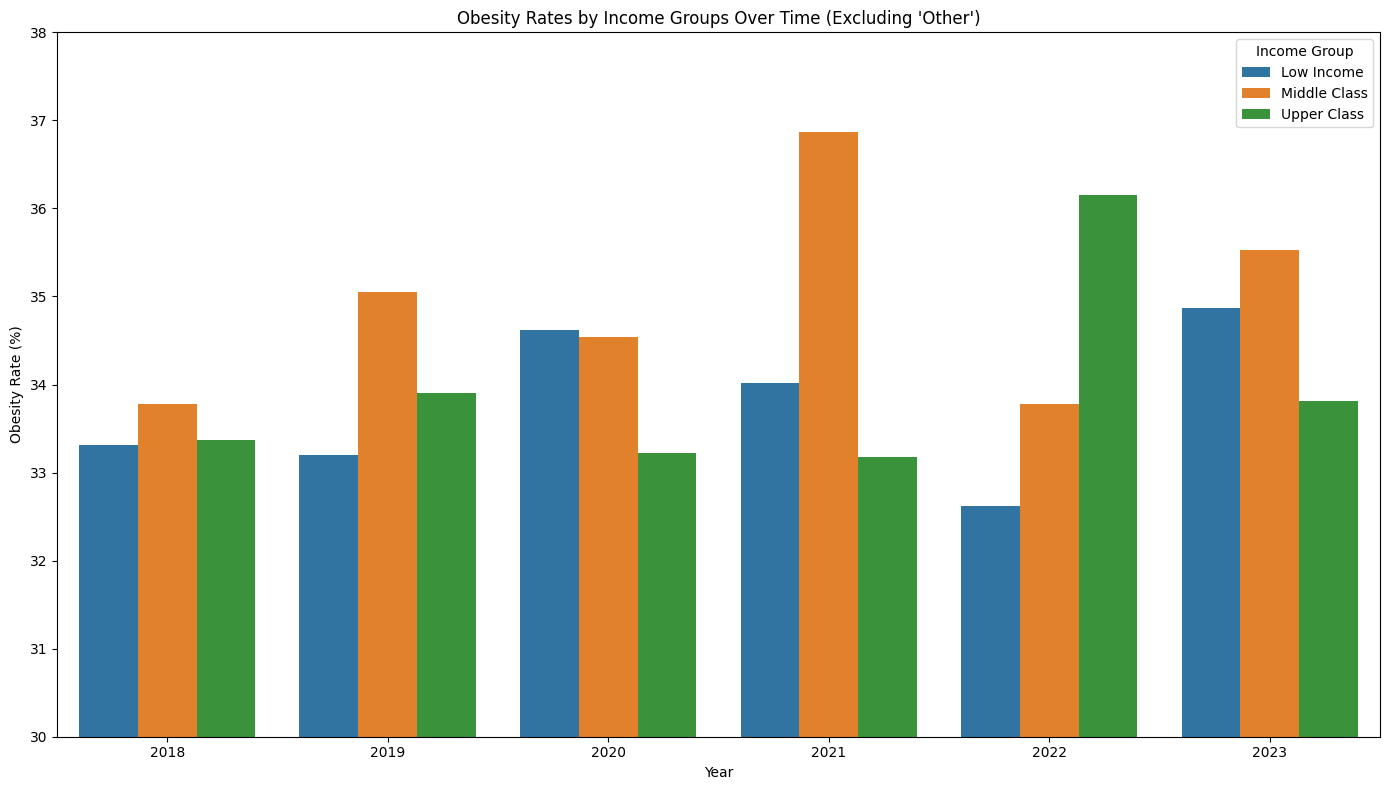

In [29]:

# Filter the data for income groups and remove the "Other" category
income_data_filtered = income_data_raw[income_data_raw['Income_Group'] != 'Other']  # Exclude 'Other'

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot using Seaborn
sns.barplot(
    data=income_data_filtered,  # Use the filtered data
    x="YearStart",
    y="Data_Value",
    hue="Income_Group",  # Use Income_Group for hue
    ci=None  # Disable confidence intervals for clarity
)

# Set the plot title and labels
plt.title("Obesity Rates by Income Groups Over Time (Excluding 'Other')")
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.ylim(30, 38)  # Adjust the y-axis limits as needed
plt.legend(title="Income Group")

# Adjust layout for better fitting
plt.tight_layout()

# Show the plot
plt.show()

### Observations:
1.The middle-income group consistently shows higher obesity rates across all years compared to other groups.
The peak occurred in 2021, with rates reaching nearly 37%, followed by a decline in 2022.By 2023, rates slightly increased to approximately 34%.
The middle-income group shows the highest obesity rates across most years, indicating a larger impact of obesity in this socioeconomic bracket.
2.The upper-income group maintains moderate obesity rates across the years.
There is a notable peak in 2022, where the rates reached their highest at about 36%.
However, a slight decrease is observed in 2023, bringing it back to around 34%.
3.The low-income group shows consistently lower obesity rates compared to other income groups.
Rates remained relatively stable with minor fluctuations across the years, hovering between 33% and 35%.
The lowest point was in 2022, followed by a slight increase in 2023.
4. Overall,The upper-income group has moderate but fluctuating trends and low-income group consistently shows the lowest obesity rates compared to others, though the trend remains relatively stable.

## Step 7: Analysis of the Relationship Between Physical Activity and Obesity Rates
 Now, we'll do the Analysis of the Relationship Between Physical Activity and Obesity Rates
### 7.1 :Filtering the Data
We will filter the dataset to separate the records related to physical activity and obesity. This will allow us to analyze the relationship between these two factors.


In [30]:
# Filter the data for Physical Activity and Obesity
physical_activity_data = data[data['Class'] == 'Physical Activity']
obesity_data = data[data['Class'] == 'Obesity / Weight Status']

# Display the filtered datasets
print("Filtered Physical Activity Data:")
print(physical_activity_data.head())

print("\nFiltered Obesity Data:")
print(obesity_data.head())

Filtered Physical Activity Data:
   YearStart          LocationDesc              Class  Data_Value  \
0       2019  District of Columbia  Physical Activity        32.6   
2       2019              Kentucky  Physical Activity        39.3   
3       2021              Illinois  Physical Activity        40.9   
4       2019            California  Physical Activity        29.4   
9       2020             Minnesota  Physical Activity        26.7   

   Sample_Size StratificationCategory1       Stratification1  
0        233.0                  Income     $50,000 - $74,999  
2        460.0                  Income     $35,000 - $49,999  
3        118.0                  Income     Less than $15,000  
4        228.0          Race/Ethnicity       2 or more races  
9       3823.0               Education  High school graduate  

Filtered Obesity Data:
   YearStart  LocationDesc                    Class  Data_Value  Sample_Size  \
1       2019  Rhode Island  Obesity / Weight Status        40.8       

## 7.2:Merging the Data
Now, we will merge the filtered datasets on `YearStart` to compare physical activity and obesity rates.


In [31]:
# Merge the data on YearStart
merged_data = pd.merge(
    physical_activity_data[['YearStart', 'Data_Value']],
    obesity_data[['YearStart', 'Data_Value']],
    on='YearStart',
    suffixes=('_Physical', '_Obesity')
)

# Display the merged dataset
print("Merged Data:")
print(merged_data.head())


Merged Data:
   YearStart  Data_Value_Physical  Data_Value_Obesity
0       2019                 32.6                40.8
1       2019                 32.6                27.4
2       2019                 32.6                30.0
3       2019                 32.6                29.6
4       2019                 32.6                33.4


## 7.3:Data Visualization
Let's visualize the relationship between physical activity rates and obesity rates over the years using line plots.


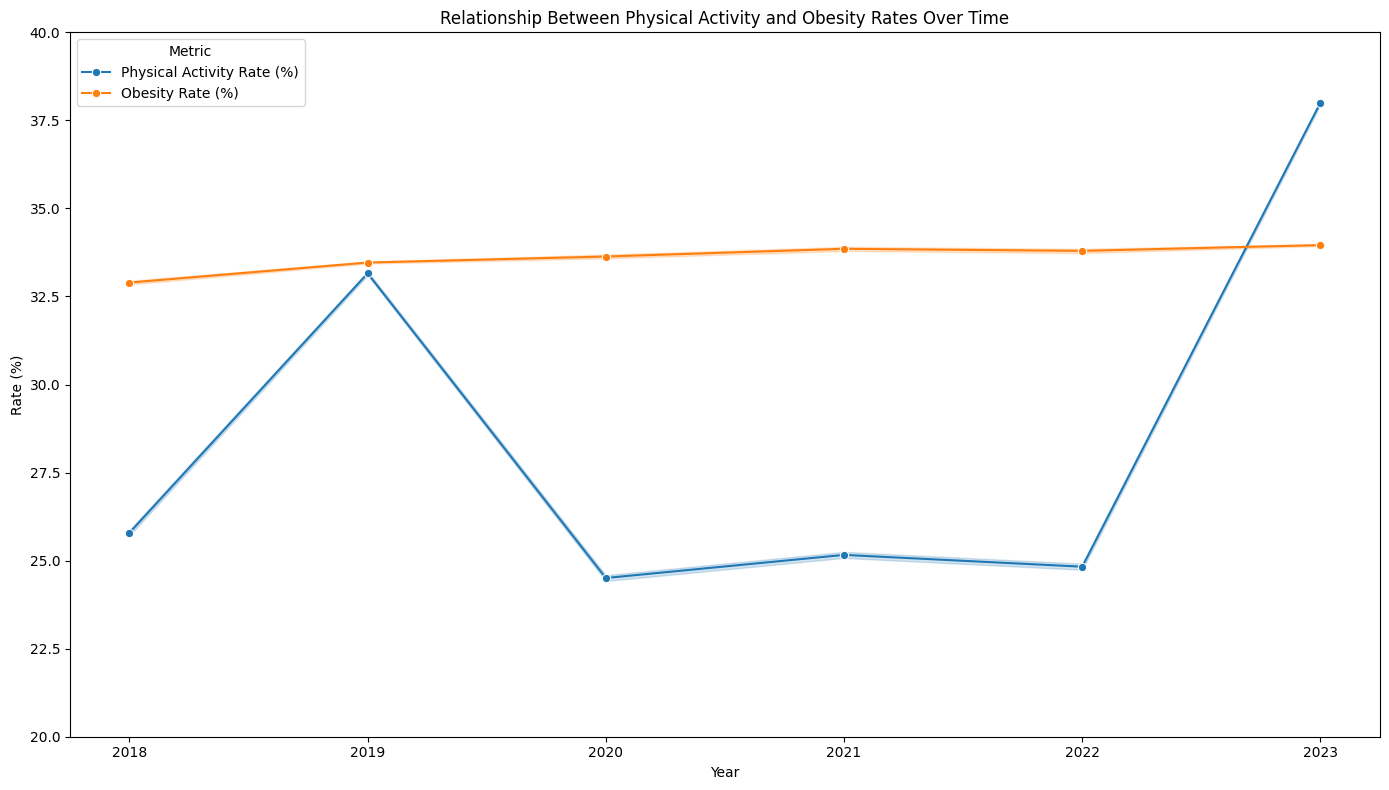

In [32]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a line plot to visualize the relationship
sns.lineplot(data=merged_data, x='YearStart', y='Data_Value_Physical', marker="o", label='Physical Activity Rate (%)')
sns.lineplot(data=merged_data, x='YearStart', y='Data_Value_Obesity', marker="o", label='Obesity Rate (%)')

# Set the plot title and labels
plt.title("Relationship Between Physical Activity and Obesity Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.ylim(20, 40)  # Adjust y-axis limits according to your data
plt.legend(title="Metric")

# Adjust layout for better fitting
plt.tight_layout()

# Show the plot
plt.show()


### Observations: 
1.Obesity rates have remained relatively stable over time, hovering around 32.5% to 33.5% .
2.Physical activity rates, on the other hand, have shown significant fluctuations:There was a peak in 2019 (~32.5%) but a sharp decline through 2020-2022, dropping to around 25%.
A steep recovery in 2023 suggests increased physical activity levels.
Key trend: When physical activity levels declined (2020-2022), obesity rates remained unaffected, suggesting that obesity may be influenced by multiple intertwined factors beyond physical activity alone. 
3.However, the sharp rise in physical activity in 2023 could be a positive indicator for future obesity trends.

## Conclusion
In this analysis, we explored the relationship between physical activity and obesity rates over the years. The visualizations help to identify trends and potential correlations between these two important public health issues. Further statistical analysis can be conducted to quantify these relationships.
